### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [165]:
data = pd.read_csv('data/coupons.csv')

In [70]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [73]:
missing_values = data.columns[data.isnull().sum() >= 1]
missing_values


Index(['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

3. Decide what to do about your missing data -- drop, replace, other...

In [76]:
# Ignore missing values in 'car' column

# Replace missing values in the 'bar' column with 'never'
data['Bar'] = data['Bar'].fillna('never')

# Replace missing values in the 'CoffeeHouse' column with 'never'
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')

# Replace missing values in the 'CarryAway' column with 'never'
data['CarryAway'] = data['CarryAway'].fillna('never')

# Replace missing values in the 'RestaurantLessThan20' column with 'never'
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')
	
# Replace missing values in the 'Restaurant20To50' column with 'never'
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')

#Change age for 50plus to 51 and below21 to 20
data['age'] = data['age'].replace({'50plus': '51', 'below21': '20'})



4. What proportion of the total observations chose to accept the coupon?



In [79]:
#total_observations = len(data)
#accepted_coupons = data['Y'].sum()
#proportion = (accepted_coupons / total_observations)*100
#proportion
#0.5684326710816777 proportion of the total observations chose to accept the coupon

data['Y'].value_counts(normalize=True)*100

Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

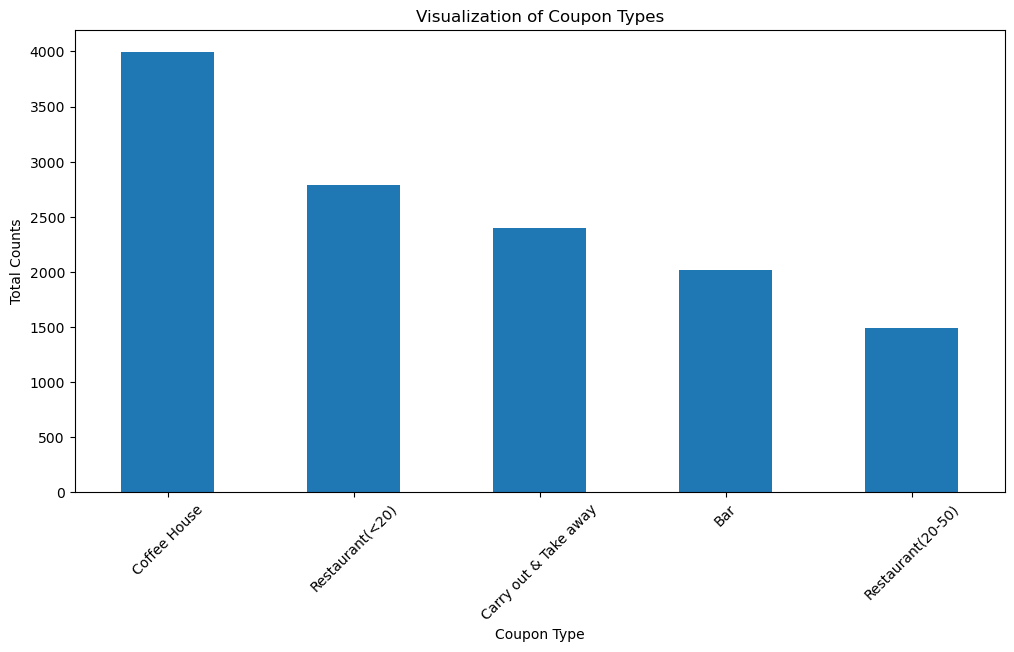

In [82]:
coupon_counts = data['coupon'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
coupon_counts.plot(kind='bar')
plt.title('Visualization of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

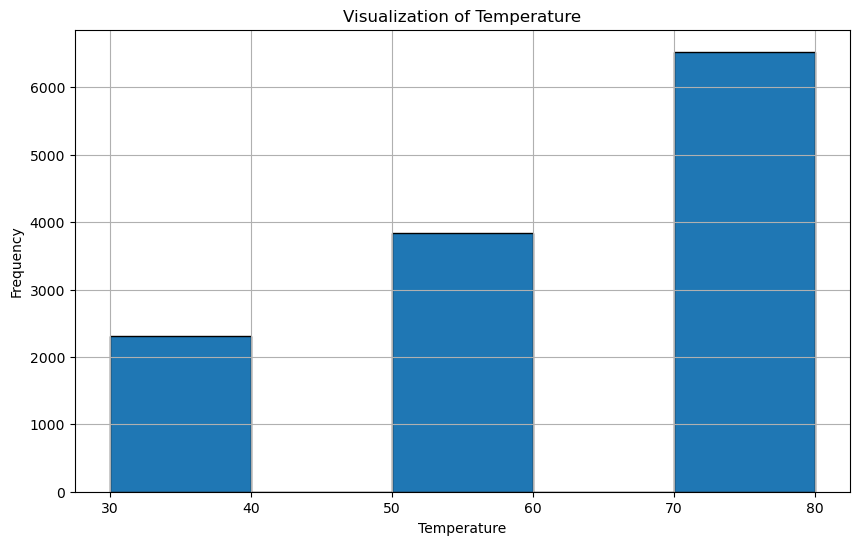

In [85]:
plt.figure(figsize=(10, 6))

# Create the histogram
data['temperature'].hist(bins=5, edgecolor='black')

# Customize the plot
plt.title('Visualization of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [89]:
#bar_coupons_df - DataFrame that contains just the bar coupons.
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [92]:
total_bar_coupons = len(bar_coupons_df)
accepted_bar_coupons = bar_coupons_df['Y'].sum()

bar_coupons_df['Y'].value_counts()


Y
0    1190
1     827
Name: count, dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar_3
less3    674
more3    153
Name: count, dtype: int64


C:\Users\mokas\AppData\Local\Temp\ipykernel_62312\3737123545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Bar_3'] = bar_coupons_df['Bar'].replace({'1~3' : 'less3', 'less1' : 'less3',  'never' : 'less3', '4~8' : 'more3',  'gt8' : 'more3'})


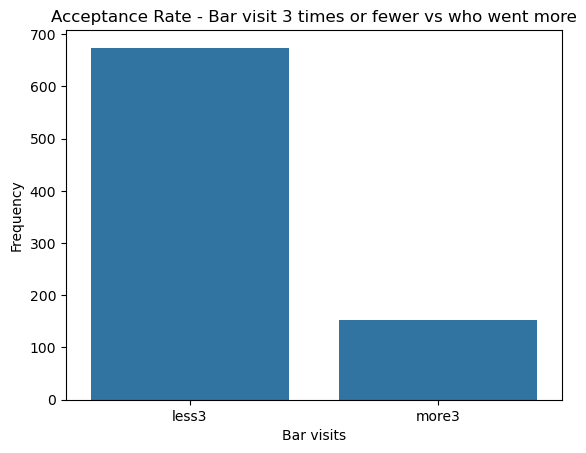

In [95]:
bar_coupons_df['Bar_3'] = bar_coupons_df['Bar'].replace({'1~3' : 'less3', 'less1' : 'less3',  'never' : 'less3', '4~8' : 'more3',  'gt8' : 'more3'})
acceptance_rates = bar_coupons_df[bar_coupons_df['Y']==1]['Bar_3'].value_counts()

sns.barplot(acceptance_rates).set(title='Acceptance Rate - Bar visit 3 times or fewer vs who went more', xlabel='Bar visits', ylabel = 'Frequency')
print(acceptance_rates)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


1726
1235
491


Text(0.5, 1.0, 'Acceptance Rates Morethan1_over25 and others')

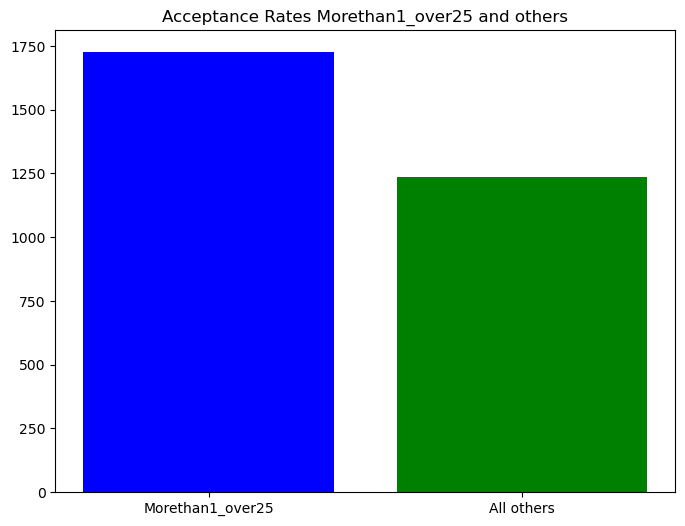

In [103]:
# Ans1 - acceptance rate between drivers who go to a bar more than once a month and are over the age of 25
condition1  = data[(data['Bar'].isin(["4~8", "gt8", "1~3"])) & (data['age'].astype(int) > 25) & (data['Y'] == 1)]
# Ans2 - All others
condition2  = data[~(data['Bar'].isin(["4~8", "gt8", "1~3"])) & (data['age'].astype(int) < 25) & (data['Y'] == 1)]

Ans1 = len(condition1)
Ans2 = len(condition2)


print (Ans1) #1726
print (Ans2) #1235
print(Ans1 - Ans2)
#Difference = 491

values = [Ans1, Ans2]
labels = ['Morethan1_over25', 'All others']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Acceptance Rates Morethan1_over25 and others')




5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


2303


<BarContainer object of 1 artists>

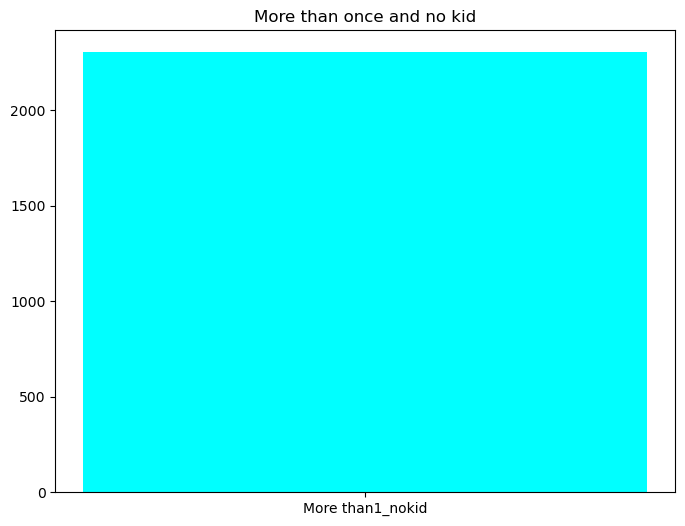

In [111]:
# Ans3 - acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
condition3 = data[(data['Bar'].isin(["4~8", "gt8", "1~3"])) & (~(data['passanger'] == "Kid(s)")) & (~(data['occupation'] == "Farming Fishing & Forestry")) & (data['Y'] == 1)]

Ans3 = len(condition3)
print (Ans3) #2303

values = [Ans3]
labels = ['More than1_nokid']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.title('More than once and no kid')
plt.bar(labels, values, color=['aqua'])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



2303
1427
1369


Text(0.5, 1.0, 'Acceptance rates between those drivers')

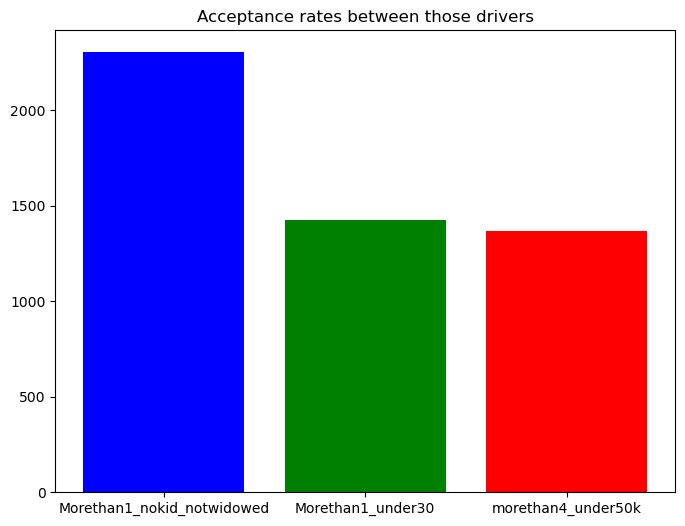

In [118]:
# acceptance rates between those drivers who:
# Ans4 - go to bars more than once a month, had passengers that were not a kid, and were not widowed

condition4 = data[(data['Bar'].isin(["4~8", "gt8", "1~3"])) & (~(data['passanger'] == "Kid(s)")) & (~(data['maritalStatus'] == "Widowed")) & (data['Y'] == 1)]

Ans4 = len(condition4)
print (Ans4) #2303

# Ans5 - go to bars more than once a month and are under the age of 30

condition5 = data[(data['Bar'].isin(["4~8", "gt8", "1~3"])) & (data['age'].astype(int) < 30) & (data['Y'] == 1) ]
#condition5 = data[(data['Bar'].isin(["4~8", "gt8", "1~3"])) & (data['age'].astype(int) < 30) ]

Ans5 = len(condition5) 
print (Ans5) ##1427

# Ans6 - go to cheap restaurants more than 4 times a month and income is less than 50K.
condition6 = data[(data['RestaurantLessThan20'].isin(["4~8", "gt8"]))  & (data['income'].isin(["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"])) & (data['Y'] == 1)]
Ans6 = len(condition6)
print (Ans6) #1369

values = [Ans4, Ans5,Ans6]
labels = ['Morethan1_nokid_notwidowed', 'Morethan1_under30', 'morethan4_under50k']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green','red'])
plt.title('Adestination
cceptance rates between those drivers')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

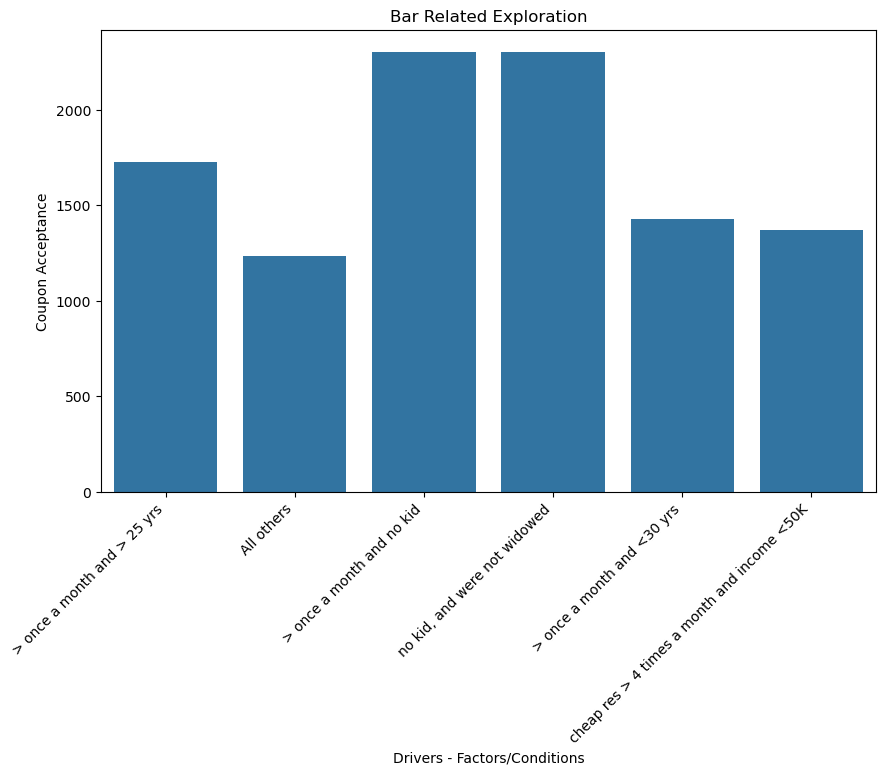

3.0

In [130]:
# Ans1 - acceptance rate between drivers who go to a bar more than once a month and are over the age of 25
# Ans2 - All others
# Ans3 - acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
# Ans4 - go to bars more than once a month, had passengers that were not a kid, and were not widowed
# Ans5 - go to bars more than once a month and are under the age of 30
# Ans6 - go to cheap restaurants more than 4 times a month and income is less than 50K.

#Gather data from all the answers
data = {
    'Drivers - Factors/Conditions': ['> once a month and > 25 yrs', 'All others', '> once a month and no kid', 'no kid, and were not widowed', '> once a month and <30 yrs', 'cheap res > 4 times a month and income <50K'],
    'Coupon Acceptance': [Ans1, Ans2, Ans3, Ans4, Ans5, Ans6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Drivers - Factors/Conditions', y='Coupon Acceptance', data=df)
plt.xticks(rotation=45, ha='right')

# Adding titles and labels
plt.title('Bar Related Exploration')
plt.xlabel('Drivers - Factors/Conditions')
plt.ylabel('Coupon Acceptance')

# Show the plot
plt.show()


3. #acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
#and 4. # acceptance rates between those drivers who:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed are same

#acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others - All others is the least
# Income <50k go less
#followed by
#go to bars more than once a month and are under the age of 30

###Drivers that didnt have a kid as a passenger tend to accept the coupons at the bar more.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Y
0    2001
1    1995
Name: count, dtype: int64

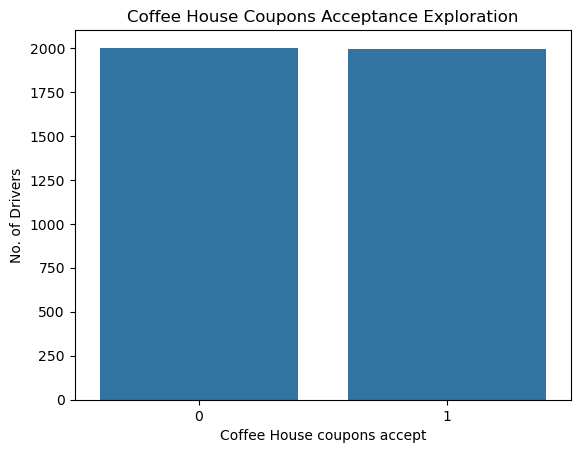

In [120]:
#Explore coffee house coupons
coffee_hse_coupons_df1 = data[data['coupon'] == 'Coffee House']

coffee_hse_coupons_df1 = coffee_hse_coupons_df1['Y'].value_counts()
sns.barplot(coffee_hse_coupons_df1).set(title='Coffee House Coupons Acceptance Exploration', xlabel='Coffee House coupons accept', ylabel = 'No. of Drivers')
coffee_hse_coupons_df1

In [156]:
data["CoffeeHouse"].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

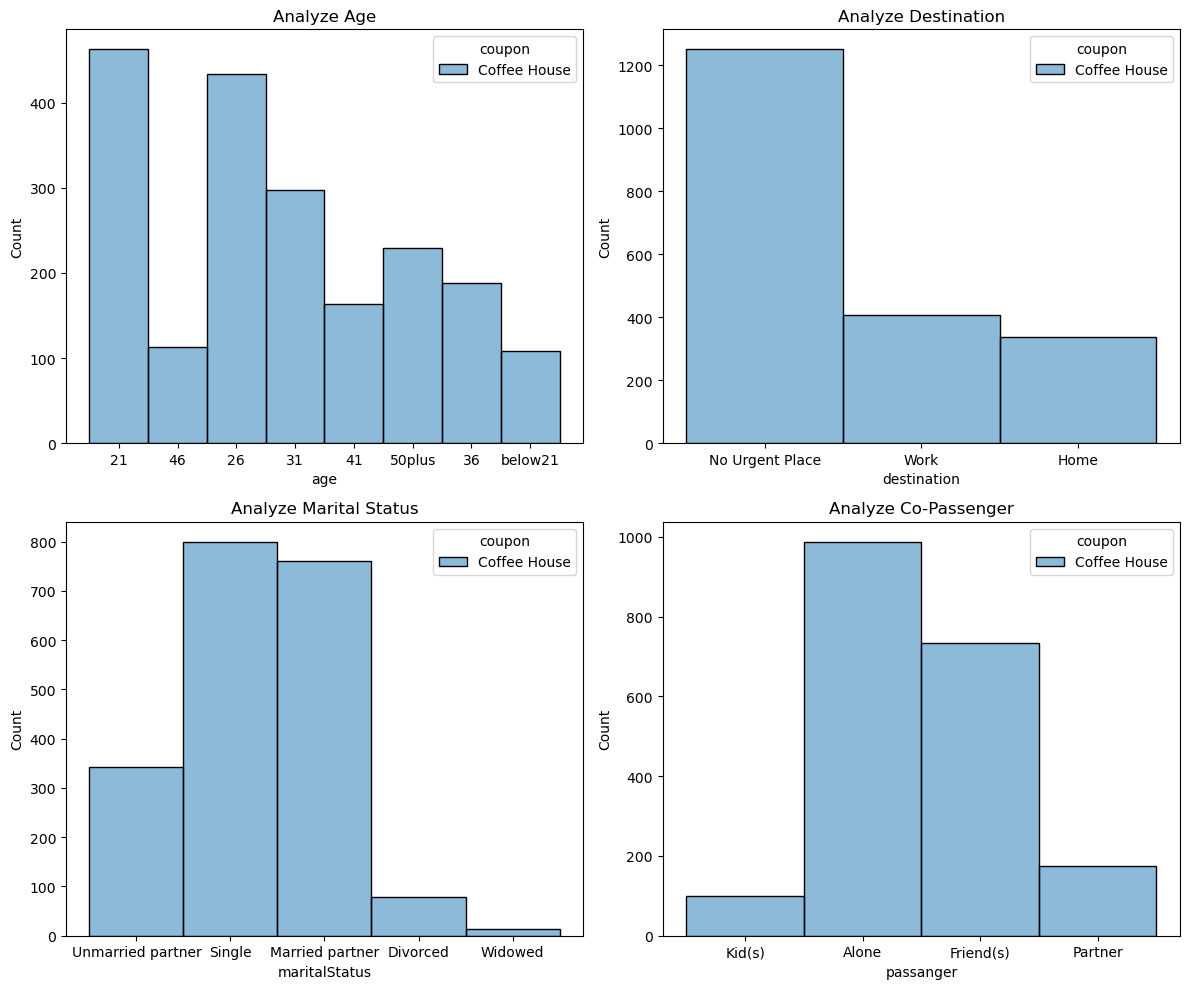

In [193]:
#Explore coffee house coupons with other factors
# coffee_hse_coupons_df1
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(coffee_hse_coupons_df1.query('Y==1'), x='age', hue = 'coupon', ax=axes[0,0]).set(title='Analyze Age')
sns.histplot(coffee_hse_coupons_df1.query('Y==1'), x='destination', hue = 'coupon',ax=axes[0,1]).set(title='Analyze Destination')
sns.histplot(coffee_hse_coupons_df1.query('Y==1'), x='maritalStatus', hue = 'coupon',ax=axes[1,0]).set(title='Analyze Marital Status')
sns.histplot(coffee_hse_coupons_df1.query('Y==1'), x='passanger', hue = 'coupon',ax=axes[1,1]).set(title='Analyze Co-Passenger')

plt.tight_layout()
plt.show()